In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory on kaggle.
from subprocess import check_output

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/Users/akstewar/Downloads/AssessmentPack/data/acquisition/Whatsgoodly-ThoughtCatalogInfluencers.csv')

In [3]:
data.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What do you think when an influencer is obviou...,Mobile,Global results,Is this product cool?,268,0.226
1,What do you think when an influencer is obviou...,Mobile,Global results,This is lame,532,0.449
2,What do you think when an influencer is obviou...,Mobile,Global results,Get that money!,293,0.247
3,What do you think when an influencer is obviou...,Mobile,Global results,Other (comment),91,0.077
4,What do you think when an influencer is obviou...,Web,Web,Is this product cool?,0,0.000


In [4]:
data1 = pd.read_csv('/Users/akstewar/Downloads/AssessmentPack/data/acquisition/WhatsgoodlyData-6.csv')

In [5]:
data1.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354


In [6]:
data1.tail()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
1445,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Facebook,215,0.180
1446,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Instagram,354,0.297
1447,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Snapchat,44,0.037
1448,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Twitter,88,0.074
1449,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,None,492,0.412


In [7]:
data1.pivot_table(index ='Question', columns ='Answer', values =['Count']) 

Count            \
Answer                                               Facebook Instagram   
Question                                                                  
What social platform has influenced your online...  35.617241  56.97931   

                                                                         \
Answer                                                   None  Snapchat   
Question                                                                  
What social platform has influenced your online...  65.296552  5.427586   

                                                               
Answer                                                Twitter  
Question                                                       
What social platform has influenced your online...  11.748276

In [8]:
data1.pivot_table(index ='Segment Description', columns ='Answer', values =['Count']) 

Count                   \
Answer                                             Facebook Instagram   None   
Segment Description                                                            
Appalachian State University                            5.0       9.0   12.0   
Arbroath Academy                                        0.0       0.0    0.0   
Are you a? SVB team member                              0.0       0.0    0.0   
Are you a? Student Trekker                              1.0       0.0    0.0   
Are you single? No                                     53.0     105.0  124.0   
Are you single? Yes                                   128.0     245.0  325.0   
Are you? Christian                                    231.0     387.0  381.0   
Are you? Jewish                                        68.0      68.0   83.0   
Are you? Muslim                                         3.0       5.0    8.0   
Are you? None/Other                                   172.0     231.0  292.0   
Arkansas Tech University                                0.0       0.0    1.0   
Auburn University                                       0.0       0.0    4.0   
Azusa Pacific University                                0.0       1.0    0.0   
Baltimore City College                                  0.0       0.0    1.0   
Bates College                                           8.0      18.0   17.0   
Baylor University                                       0.0       0.0    1.0   
Binghamtom University                                   0.0       0.0    1.0   
Blinn College                                           1.0       0.0    0.0   
Boise State University                                  0.0       1.0    0.0   
Boston University                                       0.0       1.0    0.0   
Brock University                                        0.0       1.0    0.0   
Butler University                                       9.0      13.0    6.0   
Cal Poly San Luis Obispo                                0.0       0.0    2.0   
California State University Long Beach                  0.0       1.0    0.0   
Carthage College                                        0.0       0.0    1.0   
Case Western Reserve University                         1.0       0.0    3.0   
Central Washington University                           0.0       1.0    0.0   
Centre College                                          0.0       0.0    2.0   
Chaparral High School                                   0.0       1.0    0.0   
Chapman University                                      2.0       6.0    2.0   
...                                                     ...       ...    ...   
or private school? Public                             117.0     250.0  304.0   
student loan debt? No                                 326.0     504.0  552.0   
student loan debt? Yes                                148.0     258.0  279.0   
you a feminist? No                                     45.0      58.0  150.0   
you a feminist? Yes                                    34.0      65.0   86.0   
you a virgin? No                                      362.0     579.0  596.0   
you a virgin? Yes                                     104.0     181.0  232.0   
you vote for? Didn't vote                              58.0      97.0  107.0   
you vote for? Donald Trump                             87.0     159.0  181.0   
you vote for? Gary Johnson                             62.0      60.0  113.0   
you vote for? Hillary Clinton                         197.0     285.0  291.0   
you vote for? Jill Stein                                5.0       5.0   11.0   
you vote for? Other                                    18.0      19.0   16.0   
you vote for? Writing in Bernie                        28.0      53.0   48.0   
your parents make? Middle / lower-middle class ...     41.0     111.0  144.0   
your parents make? Poor (< ~$50K) 😁                    15.0      45.0   57.0   
your parents make? Upper class (> $240K)              

In [9]:
group_name10=data1.groupby(['Segment Description','Answer','Count'])
group_name10.size().unstack()

Count                                                      0    1    2    3    \
Segment Description                             Answer                          
Appalachian State University                    Facebook   NaN  NaN  NaN  NaN   
                                                Instagram  NaN  NaN  NaN  NaN   
                                                None       NaN  NaN  NaN  NaN   
                                                Snapchat   1.0  NaN  NaN  NaN   
                                                Twitter    NaN  NaN  NaN  1.0   
Arbroath Academy                                Facebook   1.0  NaN  NaN  NaN   
                                                Instagram  1.0  NaN  NaN  NaN   
                                                None       1.0  NaN  NaN  NaN   
                                                Snapchat   1.0  NaN  NaN  NaN   
                                                Twitter    NaN  1.0  NaN  NaN   
Are you a? SVB team member                      Facebook   1.0  NaN  NaN  NaN   
                                                Instagram  1.0  NaN  NaN  NaN   
                                                None       1.0  NaN  NaN  NaN   
                                                Snapchat   1.0  NaN  NaN  NaN   
                                                Twitter    1.0  NaN  NaN  NaN   
Are you a? Student Trekker                      Facebook   NaN  1.0  NaN  NaN   
                                                Instagram  1.0  NaN  NaN  NaN   
                                                None       1.0  NaN  NaN  NaN   
                                                Snapchat   1.0  NaN  NaN  NaN   
                                                Twitter    1.0  NaN  NaN  NaN   
Are you single? No                              Facebook   NaN  NaN  NaN  NaN   
                                                Instagram  NaN  NaN  NaN  NaN   
                                                None       NaN  NaN  NaN  NaN   
                                                Snapchat   NaN  NaN  NaN  NaN   
                                                Twitter    NaN  NaN  NaN  NaN   
Are you single? Yes                             Facebook   NaN  NaN  NaN  NaN   
                                                Instagram  NaN  NaN  NaN  NaN   
                                                None       NaN  NaN  NaN  NaN   
                                                Snapchat   NaN  NaN  NaN  NaN   
                                                Twitter    NaN  NaN  NaN  NaN   
...                                                        ...  ...  ...  ...   
your zodiac sign? Libra (Sep 23 - Oct 22)       Facebook   NaN  NaN  NaN  NaN   
                                                Instagram  NaN  NaN  NaN  NaN   
                                                None       NaN  NaN  NaN  NaN   
                                                Snapchat   NaN  1.0  NaN  NaN   
                                                Twitter    NaN  NaN  NaN  NaN   
your zodiac sign? Pisces (Feb 19 - Mar 20)      Facebook   NaN  NaN  NaN  NaN   
                                                Instagram  NaN  NaN  NaN  NaN   
                                                None       NaN  NaN  NaN  NaN   
                                                Snapchat   NaN  1.0  NaN  NaN   
                                                Twitter    NaN  NaN  NaN  NaN   
your zodiac sign? Sagittarius (Nov 22 - Dec 21) Facebook   NaN  NaN  NaN  NaN   
                                                Instagram  NaN  NaN  NaN  NaN   
                                                None       NaN  NaN  NaN  NaN   
                                                Snapchat   NaN  NaN  1.0  NaN   
                                                Twitter    NaN  NaN  NaN  NaN   
your zodiac sign? Scorpio (Oct 23 - Nov 21)     Facebook   NaN  NaN  NaN  NaN   
                               

In [10]:
retention = pd.read_csv('/Users/akstewar/Downloads/AssessmentPack/data/retention/insurance_cust_retention.csv')

In [11]:
retention.head()

,Marital Status,AGE,Gender,Car Value,Years of No Claims Bonus,Annual Mileage,Payment Method,Acquisition Channel,Years of Tenure with Current Provider,Price,Actual Change in Price vs last Year,% Change in Price vs last Year,Grouped Change in Price,Renewed?
0,M,45,F,500,4,6000,Monthly,Inbound,4,289.4,-11.94,-3.96%,-0.05,0
1,M,40,M,3000,8,6000,Monthly,Inbound,4,170.4,45.62,37%,0.35,1
2,S,25,F,4000,4,4000,Monthly,Inbound,4,466.1,-123.15,-21%,-0.20,1
3,M,42,M,1800,9,10000,Annual,Inbound,4,245.1,2.34,1%,0.00,1
4,M,59,M,5000,9,3000,Annual,Inbound,4,240.5,42.56,22%,0.20,0


In [114]:
servicing = pd.read_csv('/Users/akstewar/Downloads/AssessmentPack/data/servicing/Auto_Insurance_Claims_Sample.csv')

servicing.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [115]:
servicing.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [116]:
servicing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [117]:
servicing=servicing.drop(['Customer'], axis=1)
servicing=servicing.drop(['Country'], axis=1)
servicing=servicing.drop(['Response'], axis=1)
servicing=servicing.drop(['Coverage'], axis=1)
servicing=servicing.drop(['Education'], axis=1)
servicing=servicing.drop(['Effective To Date'], axis=1)
servicing=servicing.drop(['EmploymentStatus'], axis=1)
servicing=servicing.drop(['Gender'], axis=1)
servicing=servicing.drop(['Location Code'], axis=1)
servicing=servicing.drop(['Marital Status'], axis=1)
servicing=servicing.drop(['Policy Type'], axis=1)
servicing=servicing.drop(['Policy'], axis=1)
servicing=servicing.drop(['Claim Reason'], axis=1)
servicing=servicing.drop(['Sales Channel'], axis=1)
servicing=servicing.drop(['Vehicle Class'], axis=1)
servicing=servicing.drop(['Vehicle Size'], axis=1)



In [118]:
servicing=servicing.drop(['State Code'], axis=1)
servicing=servicing.drop(['State'], axis=1)


In [136]:
# servicing['Location Code'].unique().tolist()

In [137]:
# servicing['Effective To Date'].unique().tolist()
# servicing['Effective To Date'].str.replace("/","").astype(int)

In [138]:
# servicing['Education'].unique().tolist()

In [139]:
# servicing['Vehicle Size'].unique().tolist()

In [140]:
# servicing=servicing.drop(['Effective To Date'], axis=1)

In [124]:
servicing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
Claim Amount                     9134 non-null float64
Income                           9134 non-null int64
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               9134 non-null int64
Total Claim Amount               9134 non-null float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


In [141]:
# servicing = pd.get_dummies(servicing, columns = ['State Code', 'State', 'Response','Coverage','Education','EmploymentStatus','Gender','Location Code','Marital Status','Policy Type','Policy','Claim Reason','Sales Channel','Vehicle Class','Vehicle Size'], drop_first = True)

In [126]:
servicing.head()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,56274,69,32,5,0,1,384.811147
1,697.953590,0,94,13,42,0,8,1131.464935
2,1288.743165,48767,108,18,38,0,2,566.472247
3,764.586183,0,106,18,65,0,7,529.881344
4,281.369258,43836,73,12,44,0,1,138.130879


In [127]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
data_scaled = scaler.fit_transform(servicing)

# statistics of scaled data
pd.DataFrame(servicing).describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [128]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=8, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [129]:
kmeans.inertia_

36731.18623082716

Text(0, 0.5, 'Inertia')

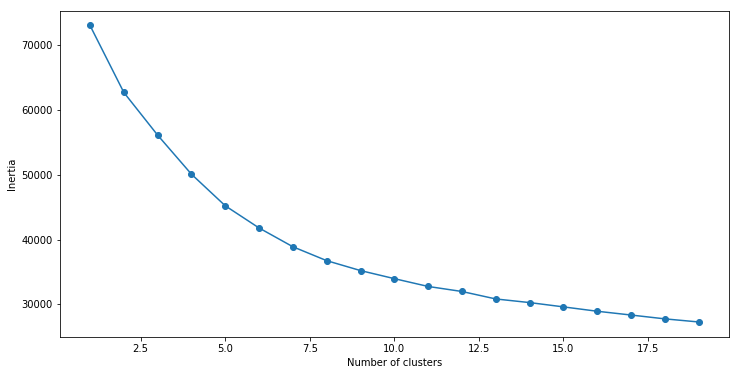

In [130]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

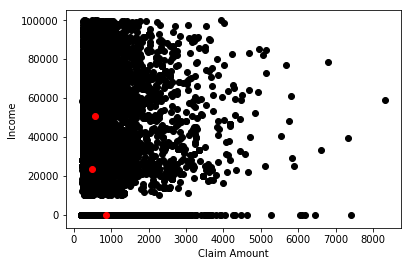

In [131]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (servicing.sample(n=K))
plt.scatter(servicing["Claim Amount"],servicing["Income"],c='black')
plt.scatter(Centroids["Claim Amount"],Centroids["Income"],c='red')
plt.xlabel('Claim Amount')
plt.ylabel('Income')
plt.show()

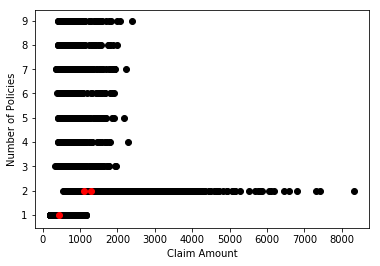

In [151]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (servicing.sample(n=K))
plt.scatter(servicing["Claim Amount"],servicing["Number of Policies"],c='black')
plt.scatter(Centroids["Claim Amount"],Centroids["Number of Policies"],c='red')
plt.xlabel('Claim Amount')
plt.ylabel('Number of Policies')
plt.show()

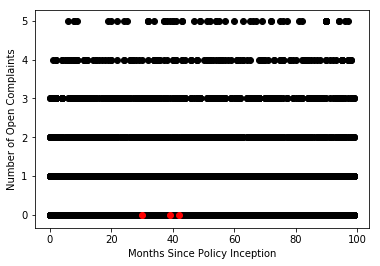

In [152]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (servicing.sample(n=K))
plt.scatter(servicing["Months Since Policy Inception"],servicing["Number of Open Complaints"],c='black')
plt.scatter(Centroids["Months Since Policy Inception"],Centroids["Number of Open Complaints"],c='red')
plt.xlabel('Months Since Policy Inception')
plt.ylabel('Number of Open Complaints')
plt.show()

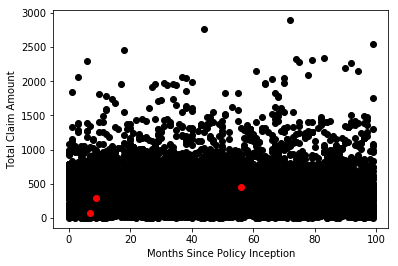

In [157]:
#number of clusters
K=3

# Select random observation as centroids
Centroids = (servicing.sample(n=K))
plt.scatter(servicing["Months Since Policy Inception"],servicing["Total Claim Amount"],c='black')
plt.scatter(Centroids["Months Since Policy Inception"],Centroids["Total Claim Amount"],c='red')
plt.xlabel('Months Since Policy Inception')
plt.ylabel('Total Claim Amount')
plt.show()

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text xticklabel objects>)

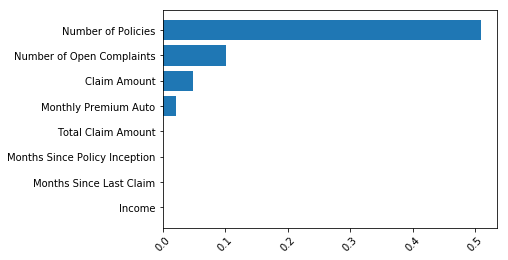

In [134]:
import operator
dt_feat_imp = dict(zip(servicing.columns, dt.feature_importances_))
lists = sorted(dt_feat_imp.items(), key=operator.itemgetter(1)) # sorted by values, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.barh(x, y)
plt.xticks(rotation=45)

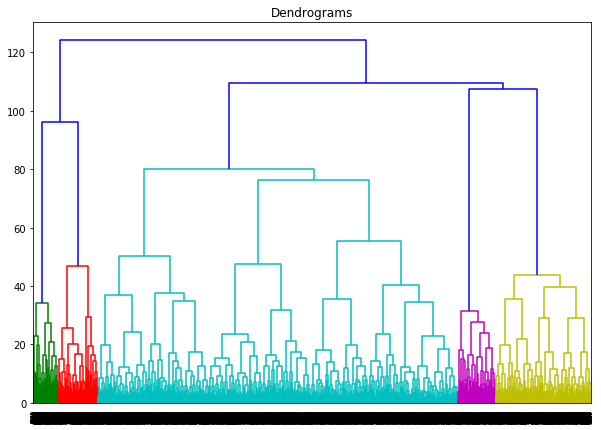

In [135]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

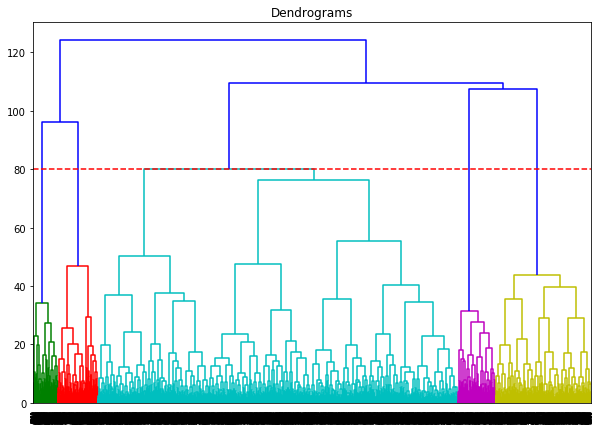

In [109]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=80, color='r', linestyle='--')

In [142]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [143]:

plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Claim Amount'], data_scaled['Income'], c=cluster.labels_) 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<Figure size 720x504 with 0 Axes>

In [15]:
retention.dtypes

Marital Status                            object
AGE                                        int64
Gender                                    object
Car Value                                  int64
Years of No Claims Bonus                   int64
Annual Mileage                             int64
Payment Method                            object
Acquisition Channel                       object
Years of Tenure with Current Provider      int64
Price                                    float64
Actual Change in Price vs last Year      float64
% Change in Price vs last Year            object
Grouped Change in Price                  float64
Renewed?                                   int64
dtype: object

In [202]:
servicing.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State Code_KS,State Code_MO,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.087366,0.344865,...,0.281038,0.193234,0.145062,0.017845,0.020145,0.196628,0.052989,0.206481,0.703306,0.193125
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.282386,0.475350,...,0.449531,0.394857,0.352183,0.132397,0.140502,0.397470,0.224023,0.404802,0.456825,0.394772
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


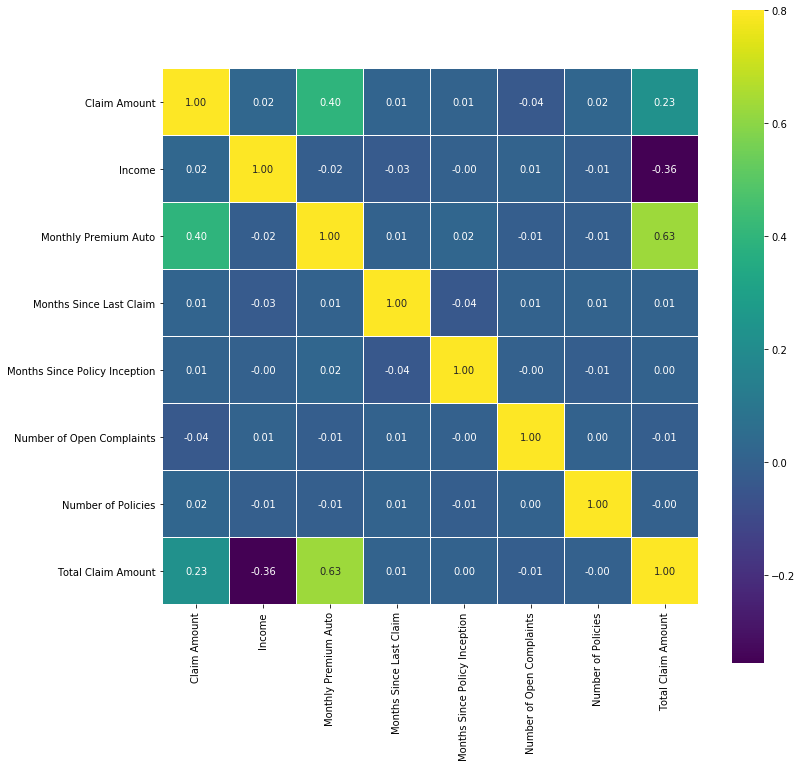

In [104]:
colormap = plt.cm.viridis
cor = servicing.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

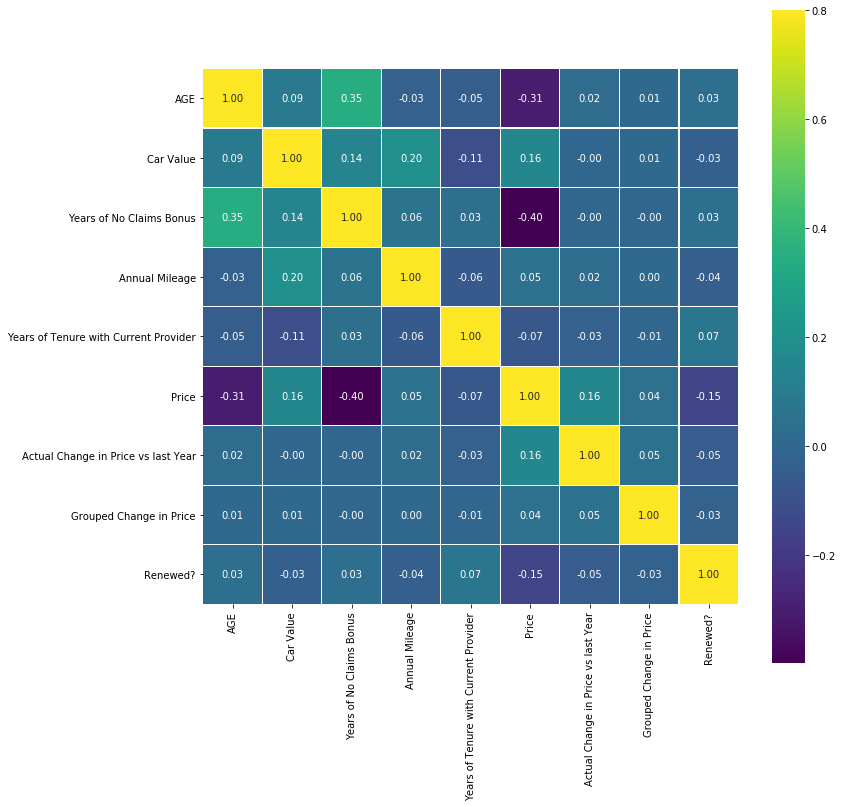

In [204]:
colormap = plt.cm.viridis
cor = retention.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

In [205]:
# From the heated Map we observe that 
# Age is negatively correlated with Price (Increase in Age decreases the Price of the insurance)
#

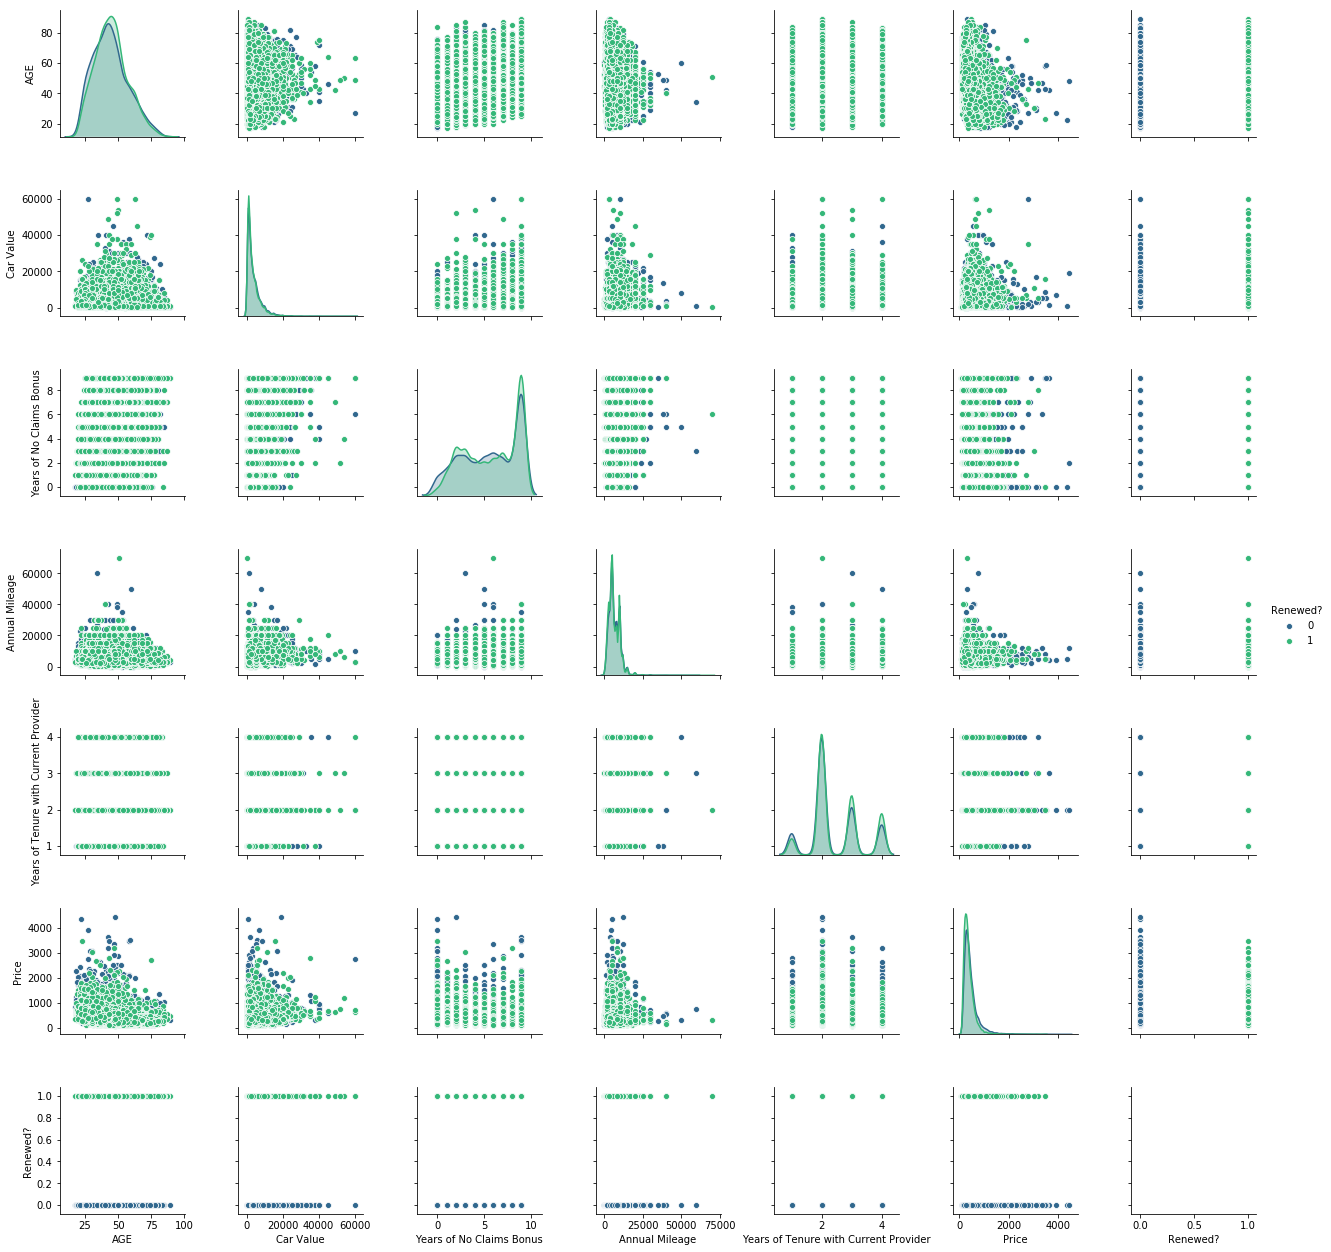

In [35]:
imp_feats = ['AGE','Car Value','Years of No Claims Bonus', 'Annual Mileage','Years of Tenure with Current Provider','Price','Renewed?']
sns.pairplot(retention[imp_feats],hue='Renewed?',palette='viridis',size=2.5)
plt.show()

In [16]:
retention.dtypes

Marital Status                            object
AGE                                        int64
Gender                                    object
Car Value                                  int64
Years of No Claims Bonus                   int64
Annual Mileage                             int64
Payment Method                            object
Acquisition Channel                       object
Years of Tenure with Current Provider      int64
Price                                    float64
Actual Change in Price vs last Year      float64
% Change in Price vs last Year            object
Grouped Change in Price                  float64
Renewed?                                   int64
dtype: object

In [17]:
retention['Marital Status'].unique().tolist()

['M', 'S', 'D', 'W', 'V']

In [18]:
retention['Gender'].unique().tolist()

['F', 'M', 'C']

In [19]:
retention['Payment Method'].unique().tolist()

['Monthly', 'Annual']

In [20]:
retention['Acquisition Channel'].unique().tolist()

['Inbound', 'Direct', 'Aggreg', 'Outbound']

In [21]:
retention['Actual Change in Price vs last Year'].unique().tolist()

[-11.94,
 45.62,
 -123.15,
 2.34,
 42.56,
 14.7,
 3.18,
 85.28,
 -192.77,
 -7.56,
 -7.13,
 -16.7,
 -80.05,
 215.47,
 -12.82,
 44.28,
 -35.64,
 8.53,
 28.59,
 97.34,
 29.69,
 281.19,
 -207.61,
 -11.96,
 -4.54,
 -4.33,
 64.99,
 19.22,
 -154.3,
 61.52,
 53.51,
 55.53,
 103.13,
 37.79,
 -13.26,
 2.56,
 24.49,
 74.3,
 416.73,
 2.71,
 -200.28,
 94.65,
 62.31,
 33.28,
 21.66,
 1019.62,
 -69.25,
 -0.25,
 21.65,
 2.5,
 -16.12,
 33.18,
 -2.77,
 -1182.66,
 40.93,
 -9.1,
 -30.58,
 23.46,
 -72.7,
 -37.57,
 19.49,
 -2.13,
 255.27,
 -124.02,
 -38.65,
 46.56,
 -44.34,
 4.42,
 47.86,
 57.13,
 19.45,
 9.16,
 12.37,
 113.18,
 1711.86,
 -94.23,
 36.08,
 26.07,
 18.59,
 -56.88,
 -50.12,
 33.38,
 5.73,
 -120.37,
 -100.66,
 13.71,
 -90.83,
 137.3,
 9.92,
 113.91,
 55.17,
 15.16,
 35.73,
 34.92,
 54.2,
 22.05,
 72.95,
 3.23,
 -10.66,
 -20.71,
 24.83,
 63.65,
 -159.45,
 3.0,
 58.55,
 18.61,
 -181.3,
 40.17,
 -65.78,
 -49.96,
 -13.06,
 73.17,
 64.85,
 -3543.33,
 103.4,
 -16.54,
 5.28,
 -57.85,
 26.05,
 -172.72,

In [22]:
retention['Actual Change in Price vs last Year'] = pd.to_numeric(retention['Actual Change in Price vs last Year'])
retention['Actual Change in Price vs last Year']

0        -11.94
1         45.62
2       -123.15
3          2.34
4         42.56
5         14.70
6          3.18
7         85.28
8       -192.77
9         -7.56
10        -7.13
11       -16.70
12       -80.05
13       215.47
14       -12.82
15        44.28
16       -35.64
17         8.53
18        28.59
19        97.34
20        29.69
21       281.19
22      -207.61
23       -11.96
24        -4.54
25        -4.33
26        64.99
27        19.22
28      -154.30
29        61.52
          ...  
19987    -39.98
19988    -61.72
19989      7.23
19990    439.36
19991     33.43
19992     57.07
19993    -14.43
19994    139.81
19995     31.45
19996     45.57
19997     -4.40
19998     48.42
19999     36.44
20000     11.72
20001    113.49
20002     18.13
20003     32.44
20004     21.73
20005    289.88
20006     47.95
20007     35.46
20008     -8.72
20009     25.99
20010   -120.19
20011    214.23
20012     81.50
20013     66.74
20014     22.90
20015     55.23
20016     42.99
Name: Actual Change in P

In [23]:
retention['% Change in Price vs last Year'].unique().tolist()

['-3.96%',
 '37%',
 '-21%',
 '1%',
 '22%',
 '7%',
 '36%',
 '-26%',
 '-4%',
 '-3%',
 '-6%',
 '-20%',
 '83%',
 '-10%',
 '48%',
 '-13%',
 '2%',
 '50%',
 '17%',
 '78%',
 '-36%',
 '-2%',
 '34%',
 '6%',
 '-34%',
 '27%',
 '33%',
 '13%',
 '-7%',
 '19%',
 '128%',
 '32%',
 '5%',
 '134%',
 '-8%',
 '0%',
 '20%',
 '-1%',
 '-85%',
 '-12%',
 '16%',
 '-14%',
 '-18%',
 '96%',
 '-19%',
 '-16%',
 '4%',
 '8%',
 '276%',
 '26%',
 '14%',
 '23%',
 '9%',
 '41%',
 '-9%',
 '39%',
 '25%',
 '-71%',
 '35%',
 '3%',
 '-11%',
 '15%',
 '-24%',
 '28%',
 '-17%',
 '11%',
 '-22%',
 '114%',
 '24%',
 '-29%',
 '-62%',
 '21%',
 '44%',
 '46%',
 '12%',
 '160%',
 '53%',
 '58%',
 '10%',
 '64%',
 '-31%',
 '-27%',
 '31%',
 '-47%',
 '74%',
 '80%',
 '30%',
 '71%',
 '47%',
 '51%',
 '-38%',
 '85%',
 '-5%',
 '-15%',
 '-32%',
 '-23%',
 '29%',
 '42%',
 '40%',
 '72%',
 '54%',
 '76%',
 '-44%',
 '52%',
 '18%',
 '93%',
 '-42%',
 '56%',
 '75%',
 '67%',
 '-43%',
 '69%',
 '-57%',
 '57%',
 '121%',
 '429%',
 '-39%',
 '-45%',
 '-41%',
 '61%',
 '-25%

In [24]:
retention.isnull().any()

Marital Status                           False
AGE                                      False
Gender                                   False
Car Value                                False
Years of No Claims Bonus                 False
Annual Mileage                           False
Payment Method                           False
Acquisition Channel                      False
Years of Tenure with Current Provider    False
Price                                    False
Actual Change in Price vs last Year      False
% Change in Price vs last Year           False
Grouped Change in Price                  False
Renewed?                                 False
dtype: bool

In [25]:
# retention['% Change in Price vs last Year'] = pd.to_numeric(retention['% Change in Price vs last Year'])
# retention['% Change in Price vs last Year']
retention['% Change in Price vs last Year'] = retention['% Change in Price vs last Year'].str.rstrip('%').astype('float') / 100.0

In [26]:
retention['Grouped Change in Price'] = pd.to_numeric(retention['Grouped Change in Price'])
retention['Grouped Change in Price']

0       -0.05
1        0.35
2       -0.20
3        0.00
4        0.20
5        0.05
6        0.00
7        0.35
8       -0.25
9       -0.05
10      -0.05
11      -0.05
12      -0.20
13       0.85
14      -0.10
15       0.50
16      -0.15
17       0.00
18       0.05
19       0.50
20       0.15
21       0.80
22      -0.35
23      -0.05
24      -0.05
25       0.00
26       0.35
27       0.05
28      -0.35
29       0.25
         ... 
19987   -0.05
19988   -0.15
19989    0.00
19990    0.70
19991    0.20
19992    0.25
19993   -0.05
19994    0.75
19995    0.15
19996    0.25
19997    0.00
19998    0.20
19999    0.10
20000    0.05
20001    0.40
20002    0.05
20003    0.10
20004    0.10
20005    0.95
20006    0.15
20007    0.25
20008    0.00
20009    0.10
20010   -0.25
20011    0.55
20012    0.20
20013    0.30
20014    0.10
20015    0.25
20016    0.15
Name: Grouped Change in Price, Length: 20017, dtype: float64

In [27]:
retention = pd.get_dummies(retention, columns =['Marital Status', 'Gender', 'Payment Method','Acquisition Channel'])

In [28]:
retention.head()

,AGE,Car Value,Years of No Claims Bonus,Annual Mileage,Years of Tenure with Current Provider,Price,Actual Change in Price vs last Year,% Change in Price vs last Year,Grouped Change in Price,Renewed?,...,Marital Status_W,Gender_C,Gender_F,Gender_M,Payment Method_Annual,Payment Method_Monthly,Acquisition Channel_Aggreg,Acquisition Channel_Direct,Acquisition Channel_Inbound,Acquisition Channel_Outbound
0,45,500,4,6000,4,289.4,-11.94,-0.0396,-0.05,0,...,0,0,1,0,0,1,0,0,1,0
1,40,3000,8,6000,4,170.4,45.62,0.3700,0.35,1,...,0,0,0,1,0,1,0,0,1,0
2,25,4000,4,4000,4,466.1,-123.15,-0.2100,-0.20,1,...,0,0,1,0,0,1,0,0,1,0
3,42,1800,9,10000,4,245.1,2.34,0.0100,0.00,1,...,0,0,0,1,1,0,0,0,1,0
4,59,5000,9,3000,4,240.5,42.56,0.2200,0.20,0,...,0,0,0,1,1,0,0,0,1,0


In [29]:
retention.shape

(20017, 24)

In [30]:


X=retention.drop('Renewed?', axis=1)
y=retention['Renewed?']

X.shape

(20017, 23)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, accuracy_score, auc, confusion_matrix

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state =1)

In [33]:
print(X_train.shape)

(15012, 23)


In [34]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)
accuracy_score(y_test, y_pred)

0.6683316683316683

In [36]:
#!pip install pydotplus
# !pip install graphviz
# !conda install python-graphviz

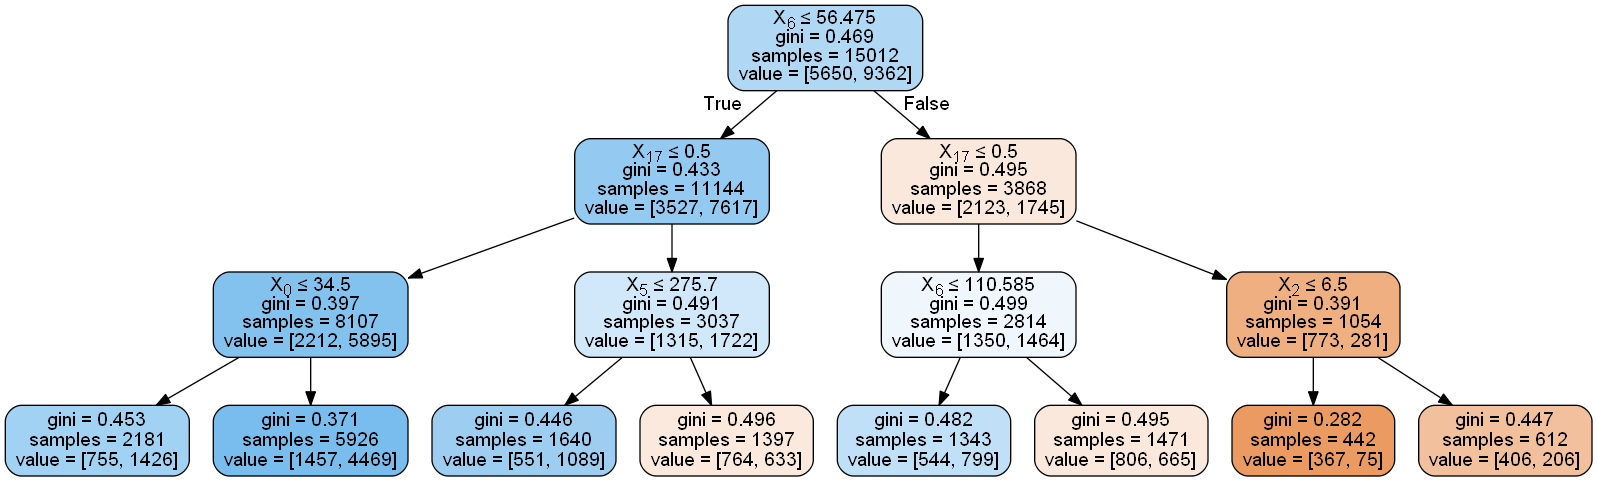

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [38]:
dt_full = DecisionTreeClassifier()
dt_full.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [39]:
conmat = np.array(confusion_matrix(y_pred, y_test))
confusion_matrix = pd.DataFrame(conmat, index = ["Act_left", "Act_Not_left"], columns = ["Pred_left", "Pred_not_left"])
confusion_matrix

,Pred_left,Pred_not_left
Act_left,798,530
Act_Not_left,1130,2547


In [40]:
accuracy_score(y_test, y_pred)

0.6683316683316683

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text xticklabel objects>)

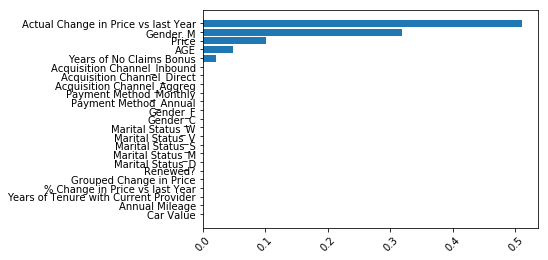

In [41]:
import operator
dt_feat_imp = dict(zip(retention.columns, dt.feature_importances_))
lists = sorted(dt_feat_imp.items(), key=operator.itemgetter(1)) # sorted by values, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.barh(x, y)
plt.xticks(rotation=45)

In [42]:
colormap = plt.cm.viridis
cor =dt.feature.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,vmax=0.8,cmap=colormap,annot=True,fmt='.2f',square=True,annot_kws={'size':10},linecolor='white',linewidths=0.1)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature'

In [43]:
rf = RandomForestClassifier(n_estimators=100,max_depth = 4, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.6761238761238761

In [44]:
base_model = RandomForestClassifier(n_estimators = 5, random_state = 1)
base_model.fit(X_train, y_train)
rf_pred = base_model.predict(X_test)
base_accuracy = accuracy_score(y_test, rf_pred)
print(base_accuracy)

0.6305694305694306


In [45]:
rf = RandomForestClassifier(n_estimators=100,max_depth = 4, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.6761238761238761

In [46]:
from sklearn.linear_model import LogisticRegression 

In [47]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

           0       0.66      0.32      0.43      1928
           1       0.68      0.90      0.77      3077

   micro avg       0.67      0.67      0.67      5005
   macro avg       0.67      0.61      0.60      5005
weighted avg       0.67      0.67      0.64      5005



In [49]:
retention['Actual Change in Price vs last Year'].corr(retention['Renewed?'])

-0.04822677561804582

In [50]:
bins= [20,30,40,50,60,70,80]
retention['AGE'] = pd.cut(retention['AGE'], bins=bins, right=False)
print(retention)

            AGE  Car Value  Years of No Claims Bonus  Annual Mileage  \
0      [40, 50)        500                         4            6000   
1      [40, 50)       3000                         8            6000   
2      [20, 30)       4000                         4            4000   
3      [40, 50)       1800                         9           10000   
4      [50, 60)       5000                         9            3000   
5      [50, 60)       2500                         6            3000   
6      [30, 40)        300                         9           10000   
7      [20, 30)        800                         9            7000   
8      [20, 30)        800                         3            5000   
9      [30, 40)       1000                         6            8000   
10     [30, 40)       1000                         7            5000   
11     [40, 50)       4295                         4           10000   
12     [60, 70)       5000                         9            

In [51]:
retention.pivot_table(index ='AGE', columns ='Renewed?', values =['Gender_C', 'Gender_F', 'Gender_M']) 

Gender_C            Gender_F            Gender_M          
Renewed?         0         1         0         1         0         1
AGE                                                                 
[20, 30)  0.000961  0.000000  0.585975  0.622835  0.413064  0.377165
[30, 40)  0.000534  0.000000  0.469834  0.477010  0.529632  0.522990
[40, 50)  0.000000  0.000746  0.443217  0.471421  0.556783  0.527833
[50, 60)  0.000000  0.001249  0.408225  0.408163  0.591775  0.590587
[60, 70)  0.000000  0.003160  0.359290  0.343602  0.640710  0.653239
[70, 80)  0.003413  0.012853  0.255973  0.246787  0.740614  0.740360

In [52]:
group_name=retention.groupby(['AGE','Renewed?','Gender_M'])
group_name.size().unstack()

Gender_M              0     1
AGE      Renewed?            
[20, 30) 0          611   430
         1          791   479
[30, 40) 0          881   992
         1         1442  1581
[40, 50) 0         1003  1260
         1         1900  2124
[50, 60) 0          536   777
         1          983  1418
[60, 70) 0          263   469
         1          439   827
[70, 80) 0           76   217
         1          101   288

In [53]:
group_name1=retention.groupby(['Years of Tenure with Current Provider','AGE','Gender_M'])
group_name1.size().unstack()

Gender_M                                           0     1
Years of Tenure with Current Provider AGE                 
1                                     [20, 30)    85    73
                                      [30, 40)   172   175
                                      [40, 50)   240   248
                                      [50, 60)   124   173
                                      [60, 70)    84   112
                                      [70, 80)    21    56
2                                     [20, 30)   680   477
                                      [30, 40)  1245  1316
                                      [40, 50)  1542  1676
                                      [50, 60)   811  1146
                                      [60, 70)   414   686
                                      [70, 80)   112   278
3                                     [20, 30)   396   220
                                      [30, 40)   527   657
                                      [40, 50)   657   934
                                      [50, 60)   325   506
                                      [60, 70)   122   284
                                      [70, 80)    27    92
4                                     [20, 30)   241   139
                                      [30, 40)   379   425
                                      [40, 50)   464   526
                                      [50, 60)   259   370
                                      [60, 70)    82   214
                                      [70, 80)    17    79

In [54]:
group_name3=retention.groupby(['% Change in Price vs last Year','AGE'])
group_name3.size().unstack().sum()

AGE
[20, 30)    2311.0
[30, 40)    4896.0
[40, 50)    6287.0
[50, 60)    3714.0
[60, 70)    1998.0
[70, 80)     682.0
dtype: float64

In [55]:
group_name4=retention.groupby(['Car Value','Annual Mileage'])
group_name4.size().unstack()

Annual Mileage,1,2,3,100,200,250,260,300,400,500,...,27000,29999,30000,30001,35000,38000,40000,50000,60000,70000
Car Value,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
group_name2=retention.groupby(['Actual Change in Price vs last Year','Years of No Claims Bonus'])
group_name2.size().unstack()

Years of No Claims Bonus,0,1,2,3,4,5,6,7,8,9
Actual Change in Price vs last Year,,,,,,,,,,
-20576.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
-7678.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
-7642.31,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-7462.74,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
-7335.28,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-6483.90,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-5213.77,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
-4255.67,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4248.49,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
retention.pivot_table(index ='Years of Tenure with Current Provider', columns ='Renewed?', values =['Gender_C', 'Gender_F', 'Gender_M']) 

Gender_C            Gender_F            \
Renewed?                                      0         1         0         1   
Years of Tenure with Current Provider                                           
1                                      0.000000  0.003584  0.456989  0.464755   
2                                      0.000729  0.001419  0.460287  0.461381   
3                                      0.000000  0.001289  0.412012  0.443299   
4                                      0.000000  0.000464  0.444867  0.451718   

                                       Gender_M            
Renewed?                                      0         1  
Years of Tenure with Current Provider                      
1                                      0.543011  0.531661  
2                                      0.538985  0.537201  
3                                      0.587988  0.555412  
4                                      0.555133  0.547818

In [58]:
retention.pivot_table(index ='Actual Change in Price vs last Year', columns ='Renewed?', values =['Gender_C', 'Gender_F', 'Gender_M']) 

Gender_C      Gender_F      Gender_M     
Renewed?                                   0    1        0    1        0    1
Actual Change in Price vs last Year                                          
-20576.48                                0.0  NaN      1.0  NaN      0.0  NaN
-7678.24                                 NaN  0.0      NaN  0.0      NaN  1.0
-7642.31                                 NaN  0.0      NaN  1.0      NaN  0.0
-7462.74                                 0.0  NaN      0.0  NaN      1.0  NaN
-7335.28                                 NaN  0.0      NaN  0.0      NaN  1.0
-6483.90                                 0.0  NaN      1.0  NaN      0.0  NaN
-5213.77                                 NaN  0.0      NaN  1.0      NaN  0.0
-4255.67                                 NaN  0.0      NaN  0.0      NaN  1.0
-4248.49                                 NaN  0.0      NaN  0.0      NaN  1.0
-4198.85                                 0.0  NaN      1.0  NaN      0.0  NaN
-4137.92                                 0.0  NaN      1.0  NaN      0.0  NaN
-3796.74                                 NaN  0.0      NaN  1.0      NaN  0.0
-3543.33                                 0.0  NaN      0.0  NaN      1.0  NaN
-3500.27                                 0.0  NaN      1.0  NaN      0.0  NaN
-3032.21                                 NaN  0.0      NaN  0.0      NaN  1.0
-2930.90                                 0.0  NaN      0.0  NaN      1.0  NaN
-2805.93                                 NaN  0.0      NaN  0.0      NaN  1.0
-2614.55                                 0.0  NaN      0.0  NaN      1.0  NaN
-2613.13                                 0.0  NaN      1.0  NaN      0.0  NaN
-2534.55                                 0.0  NaN      0.0  NaN      1.0  NaN
-2533.26                                 NaN  0.0      NaN  0.0      NaN  1.0
-2164.92                                 NaN  0.0      NaN  1.0      NaN  0.0
-2069.50                                 0.0  NaN      1.0  NaN      0.0  NaN
-1966.28                                 0.0  NaN      1.0  NaN      0.0  NaN
-1932.75                                 0.0  NaN      0.0  NaN      1.0  NaN
-1929.44                                 NaN  0.0      NaN  1.0      NaN  0.0
-1929.33                                 0.0  NaN      0.0  NaN      1.0  NaN
-1876.37                                 NaN  0.0      NaN  1.0      NaN  0.0
-1868.52                                 NaN  0.0      NaN  0.0      NaN  1.0
-1832.52                                 NaN  0.0      NaN  1.0      NaN  0.0
...                                      ...  ...      ...  ...      ...  ...
 1586.24                                 NaN  0.0      NaN  0.0      NaN  1.0
 1595.33                                 0.0  NaN      0.0  NaN      1.0  NaN
 1597.93                                 0.0  NaN      1.0  NaN      0.0  NaN
 1602.98                                 0.0  NaN      0.0  NaN      1.0  NaN
 1607.33                                 NaN  0.0      NaN  1.0      NaN  0.0
 1650.95                                 0.0  NaN      1.0  NaN      0.0  NaN
 1660.54                                 NaN  0.0      NaN  0.0      NaN  1.0
 1697.30                                 NaN  0.0      NaN  1.0      NaN  0.0
 1711.86                                 0.0  NaN      1.0  NaN      0.0  NaN
 1810.77                                 0.0  NaN      0.0  NaN      1.0  NaN
 1940.02                                 0.0  NaN      1.0  NaN      0.0  NaN
 1964.52                                 0.0  NaN      0.0  NaN      1.0  NaN
 2083.43                                 0.0  NaN      0.0  NaN      1.0  NaN
 2314.22                                 0.0  NaN      1.0  NaN      0.0  NaN
 2679.02                                 0.0  NaN      0.0  NaN      1.0  NaN
 2706.92                                 NaN  0.0      NaN  0.0      NaN  1.0
 2752.62                                 NaN  0.0      NaN  0.0      NaN  1.0
 2916.64                                 0.0  NaN      1.0

In [59]:
retention.pivot_table(index ='AGE', columns ='Gender_M', values =['Actual Change in Price vs last Year'])

# for age group between 30 and 50 years, the major attrition is hapening because of an increas in premium

Actual Change in Price vs last Year           
Gender_M                                   0          1
AGE                                                    
[20, 30)                          -17.436476 -20.524180
[30, 40)                           32.646578  21.348729
[40, 50)                           19.482611  19.933608
[50, 60)                            5.518980  20.001280
[60, 70)                           13.479117  30.264182
[70, 80)                           24.998983  35.864673

In [60]:
retention.pivot_table(index ='AGE', columns ='Gender_F', values =['Actual Change in Price vs last Year'])

Actual Change in Price vs last Year           
Gender_F                                   0          1
AGE                                                    
[20, 30)                          -21.051363 -17.091849
[30, 40)                           21.313446  32.690556
[40, 50)                           19.928916  19.487624
[50, 60)                           19.972662   5.531814
[60, 70)                           30.100077  13.688567
[70, 80)                           36.070861  24.001579

In [61]:
retention.pivot_table(index ='AGE', columns ='Renewed?', values =['Payment Method_Monthly'])


Payment Method_Monthly          
Renewed?                      0         1
AGE                                      
[20, 30)               0.801153  0.943307
[30, 40)               0.754405  0.901422
[40, 50)               0.647371  0.834245
[50, 60)               0.519421  0.697209
[60, 70)               0.348361  0.512638
[70, 80)               0.238908  0.401028

In [62]:
retention.pivot_table(index ='AGE', columns ='Renewed?', values =['Payment Method_Annual'])

Payment Method_Annual          
Renewed?                     0         1
AGE                                     
[20, 30)              0.198847  0.056693
[30, 40)              0.245595  0.098578
[40, 50)              0.352629  0.165755
[50, 60)              0.480579  0.302791
[60, 70)              0.651639  0.487362
[70, 80)              0.761092  0.598972

In [144]:
retention.pivot_table(index ='AGE', columns ='Renewed?', values =['Payment Method_Monthly','Payment Method_Annual'])

Payment Method_Annual           Payment Method_Monthly          
Renewed?                     0         1                      0         1
AGE                                                                      
[20, 30)              0.198847  0.056693               0.801153  0.943307
[30, 40)              0.245595  0.098578               0.754405  0.901422
[40, 50)              0.352629  0.165755               0.647371  0.834245
[50, 60)              0.480579  0.302791               0.519421  0.697209
[60, 70)              0.651639  0.487362               0.348361  0.512638
[70, 80)              0.761092  0.598972               0.238908  0.401028

In [150]:
group_name6=retention.groupby(['Renewed?','Payment Method_Monthly'])
group_name6.size().unstack().sum()

Payment Method_Monthly
0     5492
1    14525
dtype: int64

In [149]:
group_name6=retention.groupby(['Renewed?','Payment Method_Annual'])
group_name6.size().unstack()

Payment Method_Annual,0,1
Renewed?,,
0,4737,2841
1,9788,2651


In [63]:
retention.pivot_table(index ='Actual Change in Price vs last Year', columns ='Renewed?', values =['Gender_M']) 

Gender_M     
Renewed?                                   0    1
Actual Change in Price vs last Year              
-20576.48                                0.0  NaN
-7678.24                                 NaN  1.0
-7642.31                                 NaN  0.0
-7462.74                                 1.0  NaN
-7335.28                                 NaN  1.0
-6483.90                                 0.0  NaN
-5213.77                                 NaN  0.0
-4255.67                                 NaN  1.0
-4248.49                                 NaN  1.0
-4198.85                                 0.0  NaN
-4137.92                                 0.0  NaN
-3796.74                                 NaN  0.0
-3543.33                                 1.0  NaN
-3500.27                                 0.0  NaN
-3032.21                                 NaN  1.0
-2930.90                                 1.0  NaN
-2805.93                                 NaN  1.0
-2614.55                                 1.0  NaN
-2613.13                                 0.0  NaN
-2534.55                                 1.0  NaN
-2533.26                                 NaN  1.0
-2164.92                                 NaN  0.0
-2069.50                                 0.0  NaN
-1966.28                                 0.0  NaN
-1932.75                                 1.0  NaN
-1929.44                                 NaN  0.0
-1929.33                                 1.0  NaN
-1876.37                                 NaN  0.0
-1868.52                                 NaN  1.0
-1832.52                                 NaN  0.0
...                                      ...  ...
 1586.24                                 NaN  1.0
 1595.33                                 1.0  NaN
 1597.93                                 0.0  NaN
 1602.98                                 1.0  NaN
 1607.33                                 NaN  0.0
 1650.95                                 0.0  NaN
 1660.54                                 NaN  1.0
 1697.30                                 NaN  0.0
 1711.86                                 0.0  NaN
 1810.77                                 1.0  NaN
 1940.02                                 0.0  NaN
 1964.52                                 1.0  NaN
 2083.43                                 1.0  NaN
 2314.22                                 0.0  NaN
 2679.02                                 1.0  NaN
 2706.92                                 NaN  1.0
 2752.62                                 NaN  1.0
 2916.64                                 0.0  NaN
 2932.24                                 NaN  1.0
 3026.36                                 NaN  1.0
 3151.19                                 1.0  NaN
 3222.79                                 0.0  NaN
 3614.13                                 1.0  NaN
 4112.17                                 0.0  NaN
 4393.14                                 NaN  1.0
 5295.91                                 NaN  1.0
 5986.05                                 1.0  NaN
 7532.56                                 1.0  NaN
 16021.14                                NaN  1.0
 36974.28                                0.0  NaN

[14317 rows x 2 columns]

In [64]:
group_name5=retention.groupby(['Price','Age'])
group_name5.size().unstack().sum()

KeyError: 'Age'

In [65]:
retention.pivot_table(index ='Years of No Claims Bonus', columns ='Renewed?', values =['Gender_M','Gender_C', 'Gender_F']) 

Gender_C            Gender_F            Gender_M  \
Renewed?                         0         1         0         1         0   
Years of No Claims Bonus                                                     
0                         0.000000  0.005405  0.462396  0.475676  0.537604   
1                         0.000000  0.000000  0.479911  0.453271  0.520089   
2                         0.001397  0.000000  0.487430  0.524625  0.511173   
3                         0.000000  0.000769  0.474504  0.523846  0.525496   
4                         0.001883  0.000000  0.506591  0.491423  0.491525   
5                         0.000000  0.000000  0.463596  0.470652  0.536404   
6                         0.001321  0.001965  0.475561  0.522593  0.523118   
7                         0.000000  0.004085  0.439280  0.436275  0.560720   
8                         0.000000  0.001120  0.418455  0.408735  0.581545   
9                         0.000000  0.001811  0.396896  0.393014  0.603104   

                                    
Renewed?                         1  
Years of No Claims Bonus            
0                         0.518919  
1                         0.546729  
2                         0.475375  
3                         0.475385  
4                         0.508577  
5                         0.529348  
6                         0.475442  
7                         0.559641  
8                         0.590146  
9                         0.605175

In [68]:
retention.pivot_table(index ='Renewed?', columns ='% Change in Price vs last Year', values =['Gender_M','Gender_C', 'Gender_F']) 


Gender_C                                  \
% Change in Price vs last Year  -38.66  -22.41  -13.81  -13.02  -12.44    
Renewed?                                                                  
0                                   NaN     NaN     NaN     NaN     NaN   
1                                   0.0     0.0     0.0     0.0     0.0   

                                                                        ...  \
% Change in Price vs last Year -9.11   -8.93   -8.31   -7.22   -6.94    ...   
Renewed?                                                                ...   
0                                  0.0     NaN     NaN     NaN     0.0  ...   
1                                  NaN     0.0     0.0     0.0     NaN  ...   

                               Gender_M                                  \
% Change in Price vs last Year   9.86    11.28   11.30   11.65   12.18    
Renewed?                                                                  
0                                   NaN     NaN     NaN     1.0     0.0   
1                                   1.0     1.0     1.0     NaN     NaN   

                                                                        
% Change in Price vs last Year  13.23   21.88   23.14   55.90   441.40  
Renewed?                                                                
0                                  0.0     1.0     NaN     NaN     1.0  
1                                  NaN     NaN     1.0     0.0     NaN  

[2 rows x 1218 columns]

In [81]:
group_name5=retention.groupby(['% Change in Price vs last Year','Renewed?'])
group_name5.size().unstack().sum()

Renewed?
0     7578.0
1    12439.0
dtype: float64

In [83]:
group_name5=retention.groupby(['Renewed?','% Change in Price vs last Year'])
group_name5.size().unstack(

% Change in Price vs last Year
-38.66     1.0
-22.41     1.0
-13.81     1.0
-13.02     1.0
-12.44     1.0
-9.11      1.0
-8.93      1.0
-8.31      1.0
-7.22      1.0
-6.94      1.0
-6.78      1.0
-5.71      1.0
-5.15      1.0
-4.17      1.0
-3.88      1.0
-3.62      1.0
-3.53      1.0
-3.43      1.0
-3.37      1.0
-3.28      1.0
-2.90      1.0
-2.66      1.0
-2.64      1.0
-2.50      1.0
-2.42      1.0
-2.20      1.0
-2.15      1.0
-2.09      1.0
-2.08      1.0
-1.80      1.0
          ... 
 4.29      1.0
 4.39      1.0
 4.40      1.0
 4.45      1.0
 4.52      1.0
 4.53      1.0
 4.67      1.0
 5.02      1.0
 5.23      1.0
 5.56      1.0
 5.62      1.0
 5.82      1.0
 5.83      1.0
 6.29      1.0
 6.40      1.0
 6.53      1.0
 7.38      1.0
 7.88      1.0
 8.60      1.0
 9.08      1.0
 9.86      1.0
 11.28     1.0
 11.30     1.0
 11.65     1.0
 12.18     1.0
 13.23     1.0
 21.88     1.0
 23.14     1.0
 55.90     1.0
 441.40    1.0
Length: 406, dtype: float64